In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

In [2]:
ticker = yf.Ticker("^GSPC")

In [3]:
data = ticker.history(interval='1d', period='15y', actions=False)

In [4]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2008-12-02 00:00:00-05:00,817.940002,850.539978,817.940002,848.809998,6170100000
2008-12-03 00:00:00-05:00,843.599976,873.119995,827.599976,870.739990,6221880000
2008-12-04 00:00:00-05:00,869.750000,875.599976,833.599976,845.219971,5860390000
2008-12-05 00:00:00-05:00,844.429993,879.419983,818.409973,876.070007,6165370000
2008-12-08 00:00:00-05:00,882.710022,918.570007,882.710022,909.700012,6553600000


In [5]:
data = data[['Close']]
data

,Close
Date,
2008-12-02 00:00:00-05:00,848.809998
2008-12-03 00:00:00-05:00,870.739990
2008-12-04 00:00:00-05:00,845.219971
2008-12-05 00:00:00-05:00,876.070007
2008-12-08 00:00:00-05:00,909.700012
...,...
2023-11-27 00:00:00-05:00,4550.430176
2023-11-28 00:00:00-05:00,4554.890137
2023-11-29 00:00:00-05:00,4550.580078


In [6]:
shifted_values = data['Close'].shift(-1)

data['Percentage Change'] = ((shifted_values - data['Close']) / data['Close']) * 100

<ipython-input-6-b8b4a12d01a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Percentage Change'] = ((shifted_values - data['Close']) / data['Close']) * 100


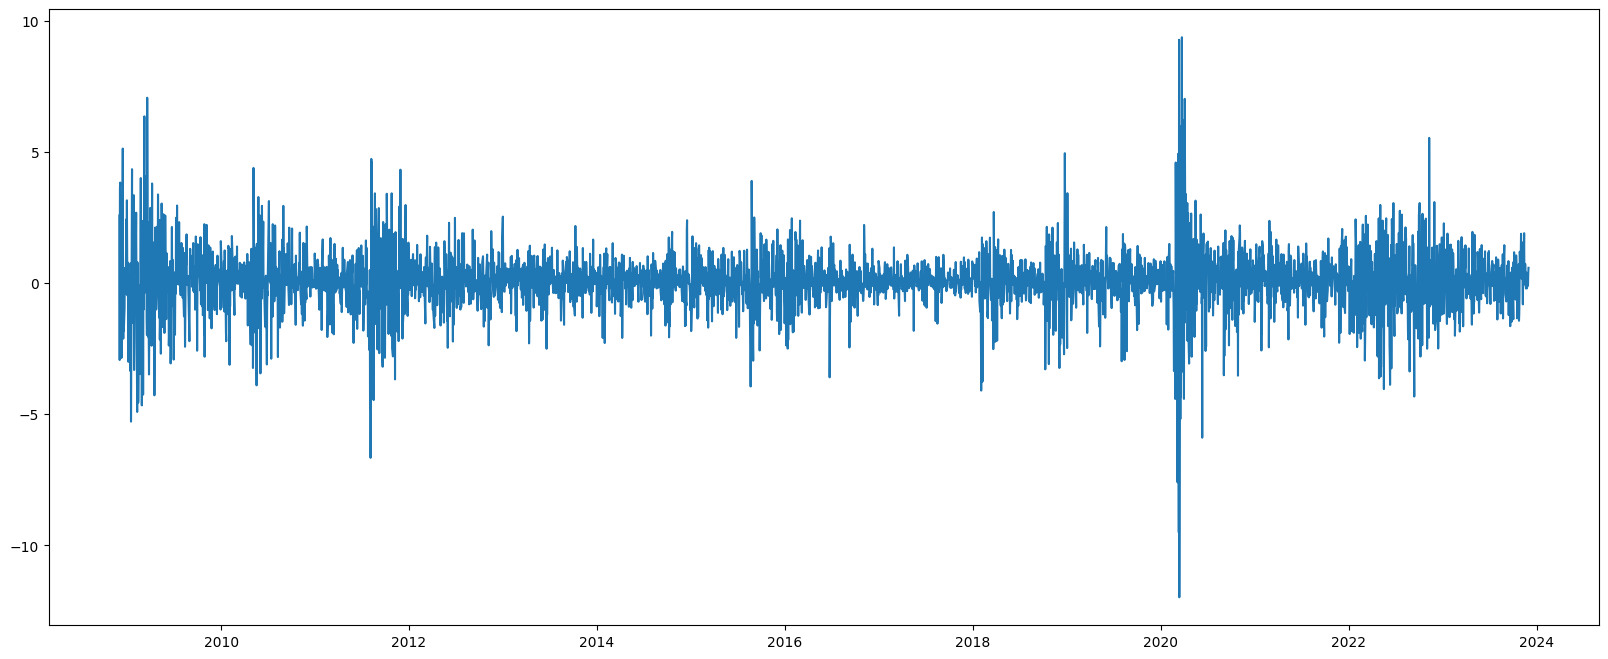

In [7]:
plt.figure(figsize=(20, 8))
plt.plot(data['Percentage Change']);

In [8]:
positives = []
negatives = []

for i in data['Percentage Change']:
  if i<0:
    negatives.append(i)
  else:
    positives.append(i)

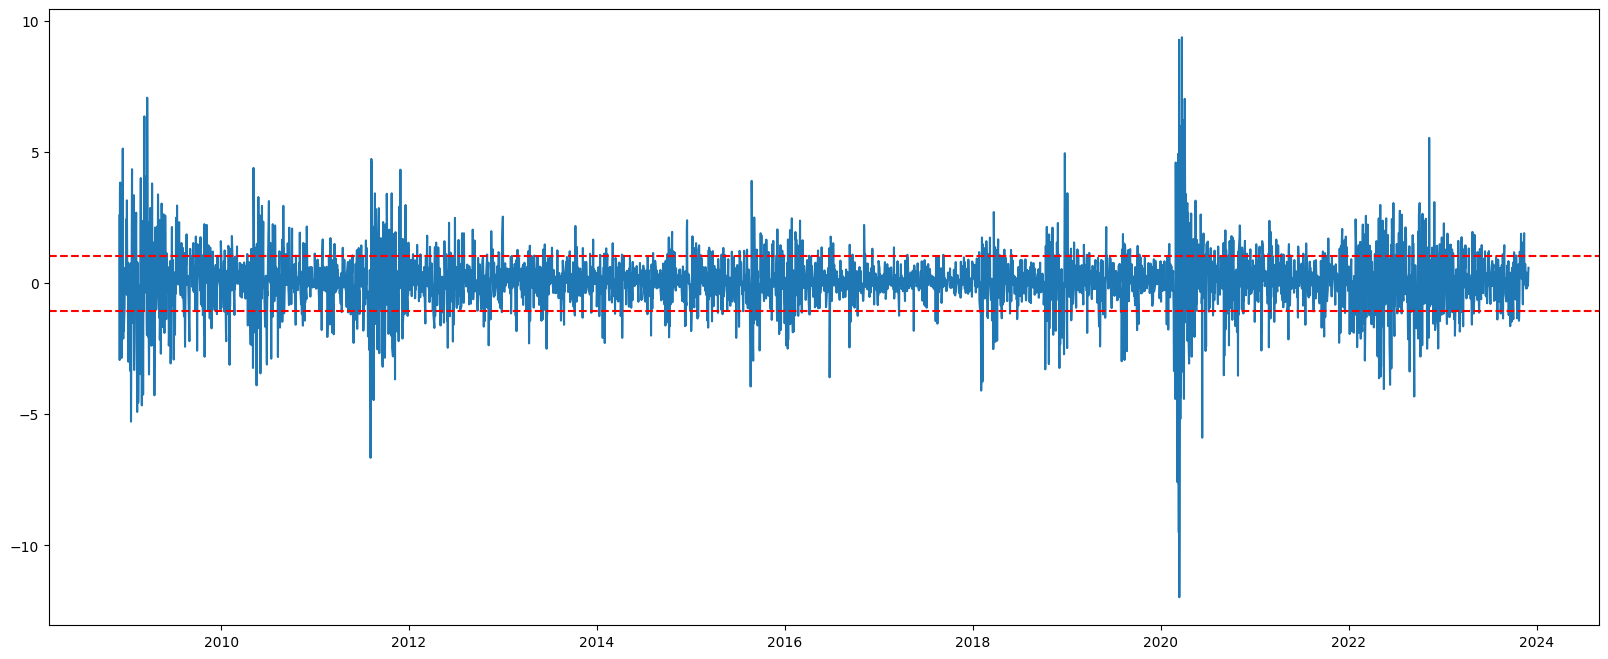

In [9]:
positives.sort()
negatives.sort()

plt.figure(figsize=(20, 8))
plt.plot(data['Percentage Change']);
plt.axhline(negatives[int(0.25*len(negatives))], c='red', linestyle='--')
plt.axhline(positives[int(0.75*len(positives))], c='red', linestyle='--')

In [10]:
threshold_low = negatives[int(0.25*len(negatives))]
threshold_high = positives[int(0.75*len(positives))]

# Apply conditions to create new columns
data['neutral'] = ((data['Percentage Change'] <= threshold_high) & (data['Percentage Change'] >= threshold_low))
data['positive'] = data['Percentage Change'] > threshold_high
data['negative'] = data['Percentage Change'] < threshold_low

# Convert boolean to integer (1 for True, 0 for False)
data['neutral'] = data['neutral'].astype(int)
data['positive'] = data['positive'].astype(int)
data['negative'] = data['negative'].astype(int)

In [11]:
data['y'] = data.Close.shift(-1)

In [12]:
data.head()

,Close,Percentage Change,neutral,positive,negative,y
Date,,,,,,
2008-12-02 00:00:00-05:00,848.809998,2.583616,0,1,0,870.739990
2008-12-03 00:00:00-05:00,870.739990,-2.930843,0,0,1,845.219971
2008-12-04 00:00:00-05:00,845.219971,3.649942,0,1,0,876.070007
2008-12-05 00:00:00-05:00,876.070007,3.838735,0,1,0,909.700012
2008-12-08 00:00:00-05:00,909.700012,-2.311754,0,0,1,888.669983


In [14]:
import tensorflow as tf
model = tf.keras.models.load_model('lstm.hdf5')

In [15]:
import pandas as pd
import numpy as np

values = data['Close'].values

# Function to create windows
def create_windows(data, window_size, horizon):
    X = []
    y = []
    for i in range(len(data) - window_size - horizon + 1):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size:i+window_size+horizon])
    return np.array(X), np.array(y)

# Create windows
window_size = 7
horizon = 1
X, y = create_windows(values, window_size, horizon)

# Predict using your model
# This step depends on your model and its input requirements
predictions = model.predict(X)

data['predicted_value'] = np.nan
data['predicted_value'].iloc[window_size:] = predictions.flatten()

118/118 [==============================] - 1s 4ms/step


<ipython-input-15-07c26a2f7b86>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_value'].iloc[window_size:] = predictions.flatten()


In [16]:
data.head(10)

,Close,Percentage Change,neutral,positive,negative,y,predicted_value
Date,,,,,,,
2008-12-02 00:00:00-05:00,848.809998,2.583616,0,1,0,870.739990,NaN
2008-12-03 00:00:00-05:00,870.739990,-2.930843,0,0,1,845.219971,NaN
2008-12-04 00:00:00-05:00,845.219971,3.649942,0,1,0,876.070007,NaN
2008-12-05 00:00:00-05:00,876.070007,3.838735,0,1,0,909.700012,NaN
2008-12-08 00:00:00-05:00,909.700012,-2.311754,0,0,1,888.669983,NaN
2008-12-09 00:00:00-05:00,888.669983,1.189419,0,1,0,899.239990,NaN
2008-12-10 00:00:00-05:00,899.239990,-2.852405,0,0,1,873.590027,NaN
2008-12-11 00:00:00-05:00,873.590027,0.702842,1,0,0,879.729980,889.427551
2008-12-12 00:00:00-05:00,879.729980,-1.268568,0,0,1,868.570007,878.572937


In [17]:
data = data.drop(['Percentage Change'], axis=1)

In [18]:
data = data.dropna()

In [19]:
data.head(10)

,Close,neutral,positive,negative,y,predicted_value
Date,,,,,,
2008-12-11 00:00:00-05:00,873.590027,1,0,0,879.729980,889.427551
2008-12-12 00:00:00-05:00,879.729980,0,0,1,868.570007,878.572937
2008-12-15 00:00:00-05:00,868.570007,0,1,0,913.179993,870.701782
2008-12-16 00:00:00-05:00,913.179993,1,0,0,904.419983,865.559387
2008-12-17 00:00:00-05:00,904.419983,0,0,1,885.280029,883.998474
2008-12-18 00:00:00-05:00,885.280029,1,0,0,887.880005,894.691101
2008-12-19 00:00:00-05:00,887.880005,0,0,1,871.630005,888.794312
2008-12-22 00:00:00-05:00,871.630005,1,0,0,863.159973,882.747375
2008-12-23 00:00:00-05:00,863.159973,1,0,0,868.150024,871.404724


In [ ]:
data.to_csv("nlp_timeseries_data.csv", index=True)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Splitting the data into training and testing sets
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

# Separating features and target
X_train = train_df.drop('y', axis=1)
y_train = train_df['y']
X_test = test_df.drop('y', axis=1)
y_test = test_df['y']

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Model is now trained
model

LinearRegression()

In [26]:
predictions = model.predict(X_test)

# Comparing predictions with actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

In [27]:
results

,Actual,Predicted
Date,,
2023-01-03 00:00:00-05:00,3852.969971,3825.229089
2020-10-29 00:00:00-04:00,3269.959961,3261.387428
2009-10-27 00:00:00-04:00,1042.630005,1014.617279
2020-09-30 00:00:00-04:00,3380.800049,3363.551071
2016-09-15 00:00:00-04:00,2139.159912,2148.017432
...,...,...
2011-12-06 00:00:00-05:00,1261.010010,1259.411644
2019-04-11 00:00:00-04:00,2907.409912,2889.250978
2015-07-17 00:00:00-04:00,2128.280029,2127.489934


In [28]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 358.0613043868705
Root Mean Squared Error: 18.922507877838775
R^2 Score: 0.9997056982521889


In [29]:
import pickle

with open('linear_regression.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
model.predict([[873.590027, 1, 0, 0, 887.342529]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([874.85581086])

In [ ]:
model.predict([[573.590027, 0, 0, 1, 587.342529]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([525.06646233])

In [31]:
from joblib import dump
dump(model, '/content/linear_regression.joblib')

['/content/linear_regression.joblib']